In [56]:
'''
A funding company has a set of historical data of all startups containing the 
spending pattern for the expense done towards R&D, Administration, marketing and location. 
The company has hired you as a Data Scientist and your role is to create and deploy the model that can 
predict the profit of the company based on company's spending pattern and company's location.

'''

"\nA funding company has a set of historical data of all startups containing the \nspending pattern for the expense done towards R&D, Administration, marketing and location. \nThe company has hired you as a Data Scientist and your role is to create and deploy the model that can \npredict the profit of the company based on company's spending pattern and company's location.\n\n"

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
df = pd.read_csv('50_Startups.csv')
#df.columns=["Research Spend","Administration","Marketing Spend","State","Profit"]
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [59]:
#Check For null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [60]:
#Check for Correlation
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


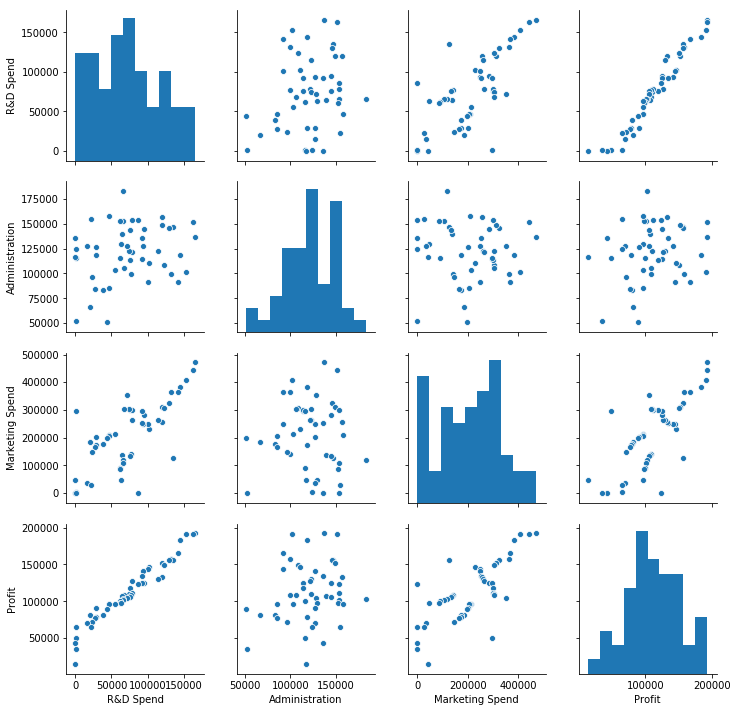

In [61]:
#Check for Correlation
sns.pairplot(df)

In [62]:
# Profit and Reserach Spend and Marketing Spend has strong correlation

In [63]:
#Create Feature and Lable

features =df.iloc[:,[0,1,2,3]].values
label =df.iloc[:,[4]].values

In [64]:
features

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [65]:
label

array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94],
       [156991.12],
       [156122.51],
       [155752.6 ],
       [152211.77],
       [149759.96],
       [146121.95],
       [144259.4 ],
       [141585.52],
       [134307.35],
       [132602.65],
       [129917.04],
       [126992.93],
       [125370.37],
       [124266.9 ],
       [122776.86],
       [118474.03],
       [111313.02],
       [110352.25],
       [108733.99],
       [108552.04],
       [107404.34],
       [105733.54],
       [105008.31],
       [103282.38],
       [101004.64],
       [ 99937.59],
       [ 97483.56],
       [ 97427.84],
       [ 96778.92],
       [ 96712.8 ],
       [ 96479.51],
       [ 90708.19],
       [ 89949.14],
       [ 81229.06],
       [ 81005.76],
       [ 78239.91],
       [ 77798.83],
       [ 71498.49],
       [ 69758.98],
       [ 65200.33],
       [ 64926.08],
       [ 49490.75],
       [ 42559.73],
       [ 35673.41],
       [ 14681.4 ]])

In [66]:
#Now Handel State Categorical Data

from sklearn.preprocessing import LabelEncoder
stateLabelEncoder=LabelEncoder()
features[:,3]=stateLabelEncoder.fit_transform(features[:,3])

from sklearn.preprocessing import OneHotEncoder
stateLabelOHE=OneHotEncoder(categorical_features=[3])
features=stateLabelOHE.fit_transform(features).toarray()

/Users/subhasishbiswas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [67]:
features

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

In [68]:
featuresDF=pd.DataFrame(features)
featuresDF

,0,1,2,3,4,5
0,0.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,0.0,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,0.0,1.0,144372.41,118671.85,383199.62
4,0.0,1.0,0.0,142107.34,91391.77,366168.42
5,0.0,0.0,1.0,131876.90,99814.71,362861.36
6,1.0,0.0,0.0,134615.46,147198.87,127716.82
7,0.0,1.0,0.0,130298.13,145530.06,323876.68
8,0.0,0.0,1.0,120542.52,148718.95,311613.29
9,1.0,0.0,0.0,123334.88,108679.17,304981.62


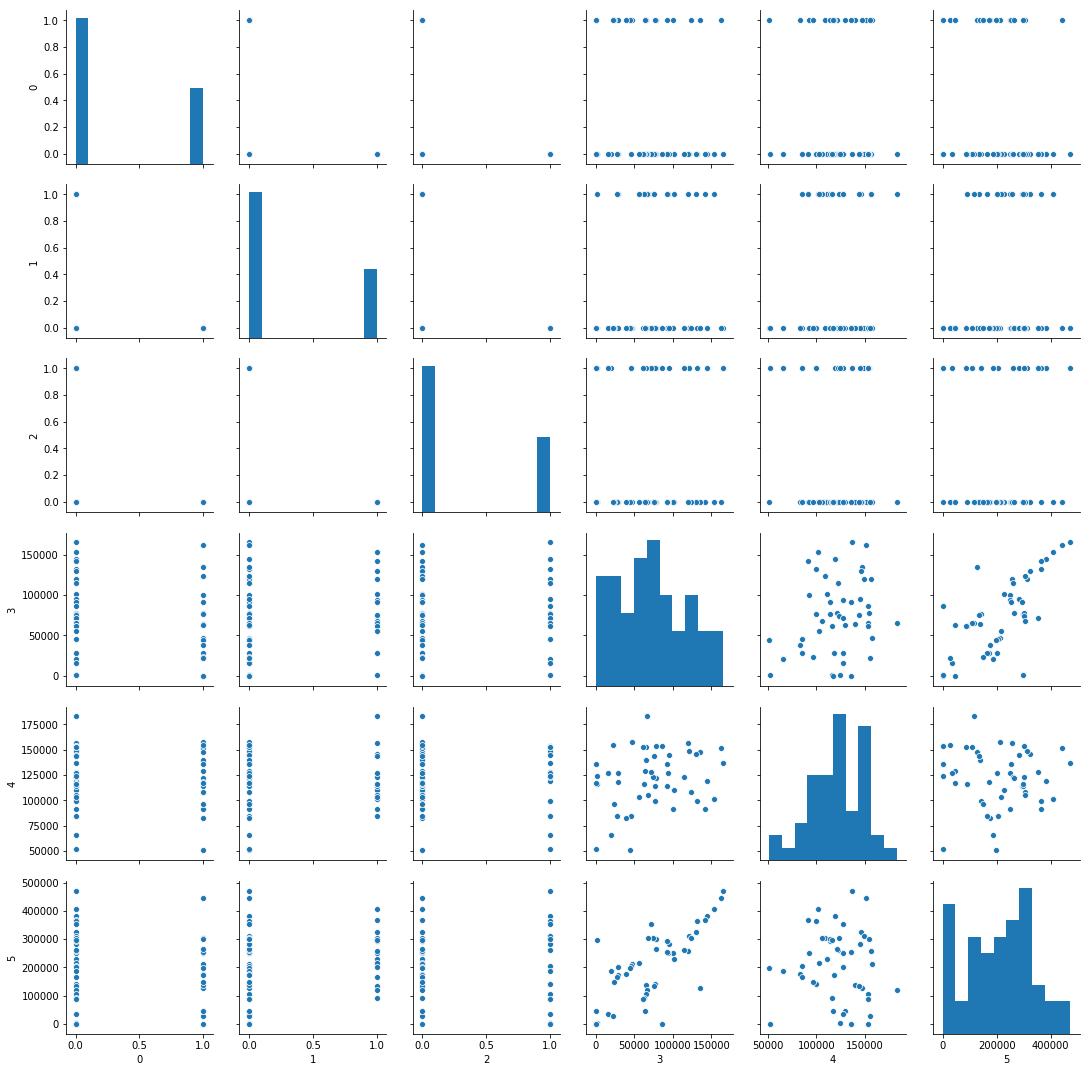

In [69]:
sns.pairplot(featuresDF)

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
for i in range(1,51):
    
    X_train,X_test,y_train,y_test =train_test_split(features,label,test_size=0.2,random_state=i)
    model=LinearRegression()
    model.fit(X_train,y_train)
    training_Score=model.score(X_train,y_train)
    test_Score=model.score(X_test,y_test)
    
    if(test_Score>training_Score):
        print("Training score: {} and Test Score: {} for Random State :{}".format(training_Score,test_Score,i))
        

Training score: 0.9424465426893971 and Test Score: 0.9649618042060633 for Random State :1
Training score: 0.9398417195515445 and Test Score: 0.9783259006626557 for Random State :2
Training score: 0.9473848999820091 and Test Score: 0.9560357304860589 for Random State :4
Training score: 0.943850522642993 and Test Score: 0.9669763022158512 for Random State :5
Training score: 0.9385918220043519 and Test Score: 0.990110511339781 for Random State :10
Training score: 0.9411603359254431 and Test Score: 0.9726607102793833 for Random State :14
Training score: 0.946138584319559 and Test Score: 0.9633877651310018 for Random State :21
Training score: 0.9425908513252554 and Test Score: 0.9757906394981196 for Random State :22
Training score: 0.9464972114069966 and Test Score: 0.9687727807395823 for Random State :24
Training score: 0.9454518446256155 and Test Score: 0.9602561948870648 for Random State :26
Training score: 0.9482961316721963 and Test Score: 0.9500997612784656 for Random State :29
Traini

In [71]:
# So Training score: 0.9385918220043519 and Test Score: 0.990110511339781 for Random State :10 is highest
#Creating Generalised Model for Random State -10
X_train,X_test,y_train,y_test =train_test_split(features,label,test_size=0.2,random_state=10)
finalModel=LinearRegression()
finalModel.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
stateLabelEncoder.classes_

array(['California', 'Florida', 'New York'], dtype=object)

In [73]:
# We Will do The Predication:
rdSpend = float(input("Enter R&D spend: "))
admSpend = float(input("Enter Administration spend: "))
marketingSpend = float(input("Enter Marketing Spend: "))
state = input("Enter State: ")

if state in stateLabelEncoder.classes_:
    
    featureInput = np.array([[rdSpend,admSpend,marketingSpend,state]])
    #Applying LabelEncoding
    featureInput[:,3] = stateLabelEncoder.transform(featureInput[:,3])
    #Applying OneHotEncoding
    featureInput = stateLabelOHE.transform(featureInput).toarray()
    #Predict
    profit = finalModel.predict(featureInput)
    #Print the profit
    print("Predicted Profit is ",profit)
    

else:
    print("Model don't know about businesses in {}".format(state))

Enter R&D spend: 2345
Enter Administration spend: 2345
Enter Marketing Spend: 2345
Enter State: California
Predicted Profit is  [[51986.93957031]]


In [74]:
#Deploye Model
import pickle
pickle.dump(finalModel,open("SBDStartupProfitModel.model",'wb'))
pickle.dump(stateLabelEncoder,open("SBStateLabelEncoder.encoder",'wb'))
pickle.dump(stateLabelOHE,open("SBStateLabelOHE.ohe",'wb'))